In [39]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd


In [40]:
iris = load_iris()

X_fts = iris.data
y_trgt = iris.target

In [41]:
# Creating a train/test split
X_train, X_test, y_train, y_test = train_test_split(X_fts, y_trgt, test_size=0.25, random_state=4)

# Create a KNN classifier with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compare the actual score with the prediction
print(metrics.accuracy_score(y_test, y_pred))

0.973684210526


**NOTE**
- If we change the random_state, it gives different accuracy score (explaining its high variance). We must do K-Fold!

### K-Fold
- K-fold is vital. It divides the dataset given the desired times by the user. If say it's 10, we divide the data into 10 parts, and each part will be the the testing set while the other 9/10 will be the training set. This is done with every 1/10 of the dataset. 

In [42]:
kf = KFold(n_splits=5, shuffle=False)

# Print out the training and testing sets
for train_index, test_index in kf.split(X_fts):
    print ('Train: ', train_index, '\n', 'Test: ', test_index, '\n\n')


Train:  [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
 Test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29] 


Train:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 1

**Notes:**
- This is quite similar to the train_test_split
- Difference is that we do not have to pass any parameter to divide the sets
- Instead, we provide how much splits we want, and that 1th of that division, will be used as the testing set

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_fts, y_trgt, cv=10, scoring='accuracy')
print(scores, scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ] 0.966666666667


**Notes:**
- The way that cross_val_scores is that it breaks that data into 10 folds. 
- It then tests the training set on the testing set and check its accuracy.
- It does for every single fold.

In [45]:
# Calculating the best value for K in KNN
# To discover the best k value, we will loop through a range of k possible values and
# for each of those values, we'll be performing a k-fold to obtain an accuracy of each k
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_fts, y_trgt, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)    

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


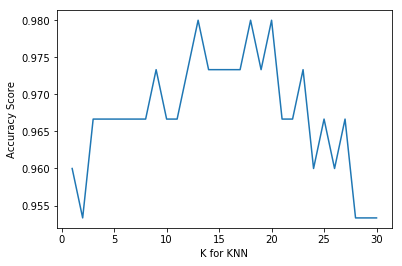

In [46]:

# Plotting the K for KNN as the x-axis against the accuracy score as the y-axis
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy Score')


**NOTE: High Bias - Low Variance tradeoff**
- There are three variables that produce the highest k for KNN 20 will be used as k for KNN
- If a model has a high bias (which can be dangerous for overfitting), it tends to produce results that are low variance because it produces results that are accurate for a specific datasets.
- If a model has a low bias, it tends to produce results that are high variance. This means that the results are quite scatter, but on average, it produce the accurate results which can be applied to a out-of-sample datasets.

In [47]:
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X_fts, y_trgt, cv=10, scoring='accuracy').mean())

0.98


In [48]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X_fts, y_trgt, cv=10, scoring='accuracy').mean())

0.953333333333


---

In [49]:
# Figuring out the best parameters in the advertisment case
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# Creating a feature columns 
fts_colmns = ['TV', 'radio', 'newspaper']

# Assiging variables to their appropriate purpise
X_fts = data[fts_colmns]
y_trgt = data.sales

In [50]:
# A 10-fold cross-validation
lm = LinearRegression()
scores = cross_val_score(lm, X_fts, y_trgt, cv=10, scoring='neg_mean_squared_error')


In [51]:
# Because the results are negative, we must fix it and then root it to get RMSE
mse_scores = - scores
rmse_scores = np.sqrt(mse_scores)

In [52]:
# The average rmse score through all the cross-validation
print(rmse_scores.mean())

1.69135317081


In [53]:
# Repeat the 10-fold cross-validation excluding newspaper
fts_colmns = ['TV', 'radio']
X_fts = data[fts_colmns]

scores = cross_val_score(lm, X_fts, y_trgt, cv=10, scoring='neg_mean_squared_error')
mse_scores = - scores 
rmse_scores = np.sqrt(mse_scores)

print(rmse_scores.mean())

1.67967484191
